## <font color=#B2D732> <span style="background-color: #4424D6"> Imports

In [9]:
# Add the imports here, I added few exemples. The library should be installed first
import os
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## <font color=#B2D732> <span style="background-color: #4424D6"> A/ Initialization

 ### <font color=#4424D6> I. main directories </font >

In [10]:
# you can complete and should modify the "config" variable
config={"main_dir":"/cerebro/cerebro1/dataset/caroline/2023_pilot_MA-MSL/",
"rawdata_dir":"/rawdata/",
"data_dir":"/derivatives/data/",

"session_names":["MA","MSL"],

 
"list_subjects":{"sub-007":{"sess01":"MSL"},"sub-013":{"sess01":"MSL"},"sub-014":{"sess01":"MSL"},"sub-015":{"sess01":"MSL"},
                "sub-008":{"sess01":"MA"},"sub-008":{"sess01":"MA"},"sub-009":{"sess01":"MA"},"sub-010":{"sess01":"MA"},"sub-011":{"sess01":"MA"},"sub-012":{"sess01":"MA"}},
 
"subjects_acq":{"sub-007":{"sess01":["RNDpre","MSL","RNDpost"]},"sub-013":{"sess01":["RNDpre","MSL","RNDpost"]},"sub-014":{"sess01":["RNDpre","MSL","RNDpost"]},"sub-015":{"sess01":["RNDpre","MSL","RNDpost"]},
"sub-008":{"sess01":["RNDpre","MA","RNDpost"]},"sub-009":{"sess01":["RNDpre","MA","RNDpost"]},"sub-010":{"sess01":["RNDpre","MA","RNDpost"]},"sub-011":{"sess01":["RNDpre","MA","RNDpost"]},"sub-012":{"sess01":["RNDpre","MA","RNDpost"]}}}#,
               #"sub-004":{"sess01":["RNDpre","MA","RNDpost"]},
               #"sub-005":{"sess01":["RNDpre","MSL","RNDpost"]},
               #"sub-006":{"sess01":["RNDpre","MA","RNDpost"]}}}

 ### <font color=#4424D6> II. select the file </font >

In [11]:
# subject loop
data={} # empty dictionnary
for subject_name in config["list_subjects"]:
    data[subject_name]={} #empty dict for each subject
    #session loop
    for sess_nb in range(0,len(config["list_subjects"][subject_name])):
        sess=config["list_subjects"][subject_name]["sess0" + str(sess_nb+1)] # name of the session for that participant
        data[subject_name][sess]={} #empty dict for each subject and session
        
        #loop for each run in a sesssion
        for run_name in config["subjects_acq"][subject_name]["sess0" + str(sess_nb+1)]:
            # name of the file that contains all necessary information
            filename=config["main_dir"] + config["data_dir"] + "/" + subject_name + "/sess_"+ sess + "/" + run_name + "/" + subject_name+ "_sess0"+str(sess_nb+1) + "_" + run_name +"_trialfilter.csv"
            
            # read the file using pandas library:
            data[subject_name][sess][run_name]=pd.read_csv(filename,delimiter=",")


## <font color=#B2D732> <span style="background-color: #4424D6"> B/ Analyses

 ### <font color=#4424D6> I. Reaction time by trial and sequence duration </font >

In [27]:
import numpy as np
# Calculate the reaction time

data_metrics={}# create empty dataframe
mean_bySeq={}
mean_byBlocks={}

#loop for each subjects --------------------
for subject_name in config["list_subjects"]:
    data_metrics[subject_name]={}# create empty dataframe
    mean_bySeq[subject_name]={}
    mean_byBlocks[subject_name]={}
    #loop for each session --------------------
    for sess_nb in range(0,len(config["list_subjects"][subject_name])):
        sess=config["list_subjects"][subject_name]["sess0" + str(sess_nb+1)] # name of the session for that participant
        data_metrics[subject_name][sess]={}# create empty dataframe
        mean_bySeq[subject_name][sess]={}
        mean_byBlocks[subject_name][sess]={}
        
        #loop for each run in a session --------------------
        for run_name in config["subjects_acq"][subject_name]["sess0" + str(sess_nb+1)]:
            # name of the file that contains all necessary information
            data_metrics[subject_name][sess][run_name]={}# create empty dataframe
            data_metrics[subject_name][sess][run_name]["participant_ID"]=data[subject_name][sess][run_name]["subject"]
            data_metrics[subject_name][sess][run_name]["trial_nb"]=data[subject_name][sess][run_name]["trial"]
            data_metrics[subject_name][sess][run_name]["trialInSeq"]=data[subject_name][sess][run_name]["trialInSeq"]
            data_metrics[subject_name][sess][run_name]["seqInBlock"]=data[subject_name][sess][run_name]["seqInBlock"]
            data_metrics[subject_name][sess][run_name]["seq_nb"]=[None] * len(data[subject_name][sess][run_name])
            data_metrics[subject_name][sess][run_name]["block_nb"]=data[subject_name][sess][run_name]["block"]
            data_metrics[subject_name][sess][run_name]["t_onset_target"]=data[subject_name][sess][run_name]["t.move"]
            data_metrics[subject_name][sess][run_name]["t_hit_target"]=data[subject_name][sess][run_name]["t.hit"]
            
            data_metrics[subject_name][sess][run_name]["RT"]=[None] * len(data[subject_name][sess][run_name])
            
            
            # create a sequence number array, starting from 0 and repeated 8 times (for 8 items in a sequence)
            sequence = []
            for j in range(len(data[subject_name][sess][run_name]["t.move"])):
                number = j
                sequence.extend([number] * 8)
                number += 1

             #loop for each trials --------------------
            for i in range(0,len(data[subject_name][sess][run_name]["t.move"])):
                RT=data[subject_name][sess][run_name]["t.hit"][i]-data[subject_name][sess][run_name]["t.move"][i]
                #if RT >=0.5:
                 #   RT=np.nan
                if data[subject_name][sess][run_name]["remove_seq"][i]==1:
                    RT=np.nan
                data_metrics[subject_name][sess][run_name]["RT"][i]=RT
                data_metrics[subject_name][sess][run_name]["seq_nb"][i]=sequence[i]
            
            data_metrics[subject_name][sess][run_name]["RT"]=pd.to_numeric(data_metrics[subject_name][sess][run_name]["RT"], errors='coerce')
            data_metrics[subject_name][sess][run_name]=pd.DataFrame(data_metrics[subject_name][sess][run_name])
           

In [51]:
data_metrics[subject_name][sess][run_name]["RT"]==

,participant_ID,trial_nb,trialInSeq,seqInBlock,seq_nb,block_nb,t_onset_target,t_hit_target,RT
0,sub-012,0,0,0,0,0,19.888458,21.109935,1.221476
1,sub-012,1,1,0,0,0,21.111463,22.161084,1.049621
2,sub-012,2,2,0,0,0,22.162257,23.218802,1.056545
3,sub-012,3,3,0,0,0,23.219699,24.083220,0.863521
4,sub-012,4,4,0,0,0,24.084234,25.188865,1.104631
...,...,...,...,...,...,...,...,...,...
315,sub-012,315,3,9,39,3,236.355812,237.146180,0.790368
316,sub-012,316,4,9,39,3,237.147248,237.784315,0.637067
317,sub-012,317,5,9,39,3,237.785633,238.428880,0.643247
318,sub-012,318,6,9,39,3,238.430022,239.125451,0.695429


In [50]:
data["sub-007"]["MSL"][run_name][(data["sub-007"]["MSL"][run_name]["remove_seq"]==1) & (data["sub-007"]["MSL"][run_name]["remove_seq"]==1) ]

,subject,trial,remove_trial,remove_seq,trialInSeq,seqInBlock,block,target.angle,targetHit,t.move,t.hit
8,sub-007,8,1,1,0,1,0,-90,YES,24.512521,24.949568
9,sub-007,9,0,1,1,1,0,0,YES,24.952456,25.311606
10,sub-007,10,0,1,2,1,0,-90,YES,25.312401,25.803581
11,sub-007,11,0,1,3,1,0,0,YES,25.804478,26.156399
12,sub-007,12,0,1,4,1,0,-90,YES,26.157249,26.545955
...,...,...,...,...,...,...,...,...,...,...,...
307,sub-007,307,0,1,3,8,3,90,YES,190.751223,191.142238
308,sub-007,308,0,1,4,8,3,180,YES,191.146938,191.633478
309,sub-007,309,0,1,5,8,3,90,YES,191.634366,191.998365
310,sub-007,310,0,1,6,8,3,180,YES,191.999365,192.460484


### <font color=#4424D6> II. Create a dataframe grouping by sequences </font >

In [42]:
mean_bySeq[subject_name][sess]={}
for subject_name in config["list_subjects"]:
    mean_bySeq[subject_name]={}
       #loop for each session --------------------
    for sess_nb in range(0,len(config["list_subjects"][subject_name])):
        sess=config["list_subjects"][subject_name]["sess0" + str(sess_nb+1)] # name of the session for that participant
        mean_bySeq[subject_name][sess]={}
        #loop for each run in a session --------------------
        for run_name in config["subjects_acq"][subject_name]["sess0" + str(sess_nb+1)]:
            # Create a data frame by sequence
            mean_bySeq[subject_name][sess][run_name]=pd.DataFrame(columns=["participant_ID","run_name","block_nb","seqRun","seq_nb","duration"])
            mean_bySeq[subject_name][sess][run_name]["seq_nb"] = pd.DataFrame(data_metrics[subject_name][sess][run_name][data_metrics[subject_name][sess][run_name]["trialInSeq"]!=0].groupby('seq_nb')['RT'].mean()).reset_index()["seq_nb"]
            
            if run_name=="RNDpre":
                mean_bySeq[subject_name][sess][run_name]["block_nb"]= pd.DataFrame(data_metrics[subject_name][sess][run_name].groupby('seq_nb')['block_nb'].mean()).reset_index()["block_nb"]
                #mean_bySeq[subject_name][sess][run_name]["seqRun"]= data_metrics[subject_name][sess][run_name]["seq_nb"] 
            elif run_name=="RNDpost":
                mean_bySeq[subject_name][sess][run_name]["block_nb"]= pd.DataFrame(data_metrics[subject_name][sess][run_name].groupby('seq_nb')['block_nb'].mean()).reset_index()["block_nb"] + 4 + 25
                #mean_bySeq[subject_name][sess][run_name]["seqRun"]= data_metrics[subject_name][sess][run_name]["seq_nb"] + (4+25) *10
            else:
                mean_bySeq[subject_name][sess][run_name]["block_nb"]= pd.DataFrame(data_metrics[subject_name][sess][run_name].groupby('seq_nb')['block_nb'].mean()).reset_index()["block_nb"] + 4
                #mean_bySeq[subject_name][sess][run_name]["seqRun"]= data_metrics[subject_name][sess][run_name]["seq_nb"] + (4*10)
            mean_bySeq[subject_name][sess][run_name]["participant_ID"]=subject_name
            mean_bySeq[subject_name][sess][run_name]["run_name"]=run_name
            
            duration_sq=[]
            # Calculate the duration to execute a sequence of 8 items
            for sequence_nb in data_metrics[subject_name][sess][run_name]["seq_nb"].unique():
                duration_sq.append(data_metrics[subject_name][sess][run_name]["t_onset_target"][(data_metrics[subject_name][sess][run_name]["seq_nb"]==sequence_nb) & (data_metrics[subject_name][sess][run_name]["trialInSeq"]==7)].values[0]-data_metrics[subject_name][sess][run_name]["t_onset_target"][(data_metrics[subject_name][sess][run_name]["seq_nb"]==sequence_nb) & (data_metrics[subject_name][sess][run_name]["trialInSeq"]==0)].values[0])
        
            mean_bySeq[subject_name][sess][run_name]["duration"]=duration_sq

### <font color=#4424D6> III. Concatenate the runs </font >

In [35]:
#loop for each subjects --------------------
mean_bySeq_concat={}
for subject_name in config["list_subjects"]:
    mean_bySeq_concat[subject_name]={}
    for sess_nb in range(0,len(config["list_subjects"][subject_name])):
        sess=config["list_subjects"][subject_name]["sess0" + str(sess_nb+1)] # name of the session for that participant
          
        mean_bySeq_concat[subject_name][sess]=pd.concat([mean_bySeq[subject_name][sess]["RNDpre"],mean_bySeq[subject_name][sess][config["list_subjects"][subject_name]["sess01"]],mean_bySeq[subject_name][sess]["RNDpost"]])

        # Reset the index
        mean_bySeq_concat[subject_name][sess]= mean_bySeq_concat[subject_name][sess].reset_index(drop=True)


### <font color=#4424D6> IV. Concatenate subjects </font >

In [36]:
#MSL participants:
mean_bySeqbyMSL_concat=pd.concat([mean_bySeq_concat["sub-007"]["MSL"], mean_bySeq_concat["sub-013"]["MSL"],mean_bySeq_concat["sub-014"]["MSL"],mean_bySeq_concat["sub-015"]["MSL"]])
mean_bySeqbyMSL_concat=mean_bySeqbyMSL_concat.reset_index(drop=True)

#MA participants:
mean_bySeqbyMA_concat=pd.concat([mean_bySeq_concat["sub-009"]["MA"],mean_bySeq_concat["sub-010"]["MA"],mean_bySeq_concat["sub-011"]["MA"],mean_bySeq_concat["sub-012"]["MA"]])
mean_bySeqbyMA_concat=mean_bySeqbyMA_concat.reset_index(drop=True)


(1.0, 5.0)

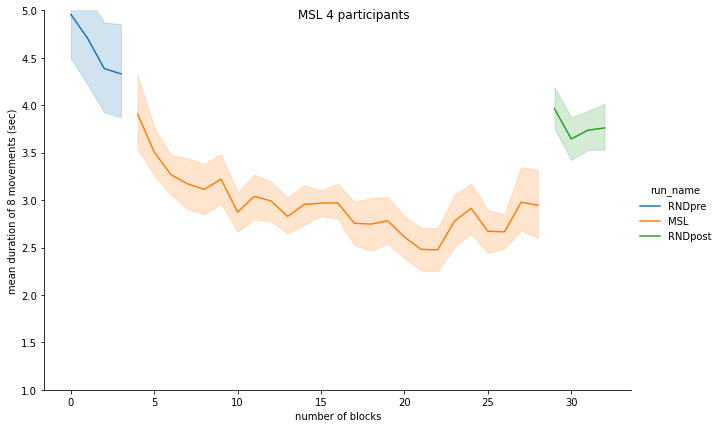

In [44]:
plot=sns.relplot(x="block_nb", y="duration",hue="run_name",data=mean_bySeqbyMSL_concat,kind="line", height=6, aspect=1.5)
plot.set_axis_labels('number of blocks', 'mean duration of 8 movements (sec)')
plot.fig.suptitle('MSL 4 participants')
plt.ylim(1, 5)  # Set the y-axis limits from 0 to 10


(1.0, 5.0)

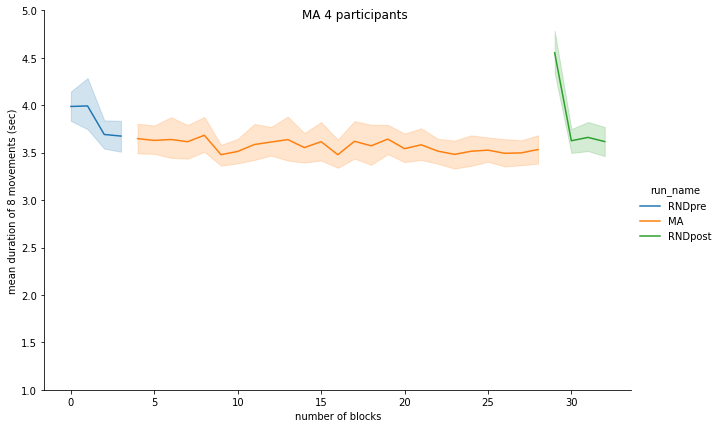

In [71]:
plot=sns.relplot(x="block_nb", y="duration",hue="run_name",data=mean_bySeqbyMA_concat,kind="line", height=6, aspect=1.5)
plot.set_axis_labels('number of blocks', 'mean duration of 8 movements (sec)')
plot.fig.suptitle('MA 4 participants')
plt.ylim(1, 5)  # Set the y-axis limits from 0 to 10


(1.0, 5.0)

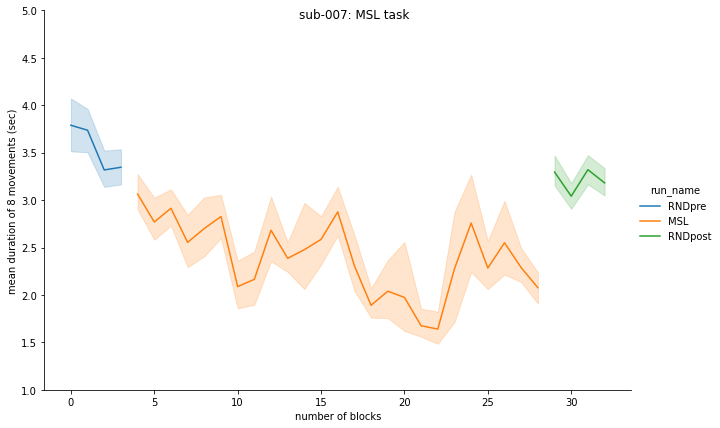

In [45]:
plot=sns.relplot(x="block_nb", y="duration",hue="run_name",data=mean_bySeq_concat["sub-007"]["MSL"],kind="line", height=6, aspect=1.5)
plot.set_axis_labels('number of blocks', 'mean duration of 8 movements (sec)')
plot.fig.suptitle('sub-007: MSL task')
plt.ylim(1, 5)  # Set the y-axis limits from 0 to 10


(1.0, 5.0)

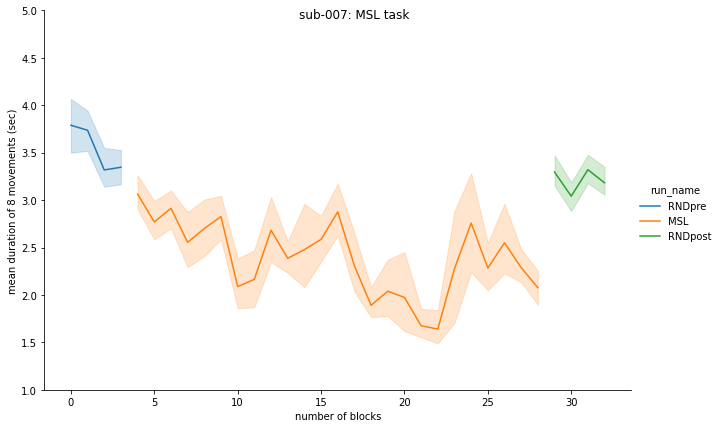

In [23]:
plot=sns.relplot(x="block_nb", y="duration",hue="run_name",data=mean_bySeq_concat["sub-007"]["MSL"],kind="line", height=6, aspect=1.5)
plot.set_axis_labels('number of blocks', 'mean duration of 8 movements (sec)')
plot.fig.suptitle('sub-007: MSL task')
plt.ylim(1, 5)  # Set the y-axis limits from 0 to 10


(1.0, 8.0)

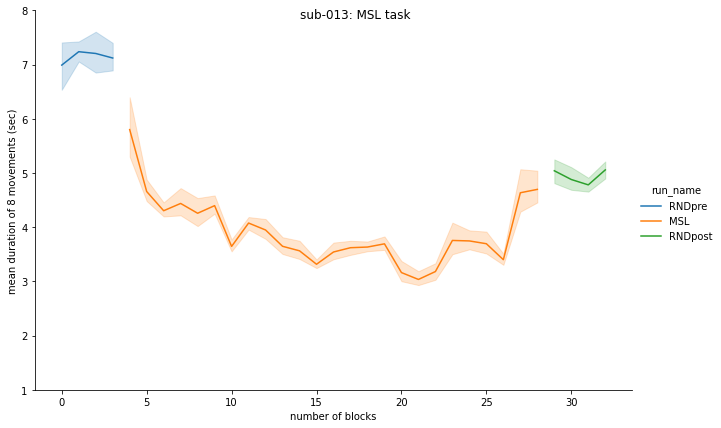

In [67]:
plot=sns.relplot(x="block_nb", y="duration",hue="run_name",data=mean_bySeq_concat["sub-013"]["MSL"],kind="line", height=6, aspect=1.5)
plot.set_axis_labels('number of blocks', 'mean duration of 8 movements (sec)')
plot.fig.suptitle('sub-013: MSL task')
plt.ylim(1, 8)  # Set the y-axis limits from 0 to 10


(1.0, 5.0)

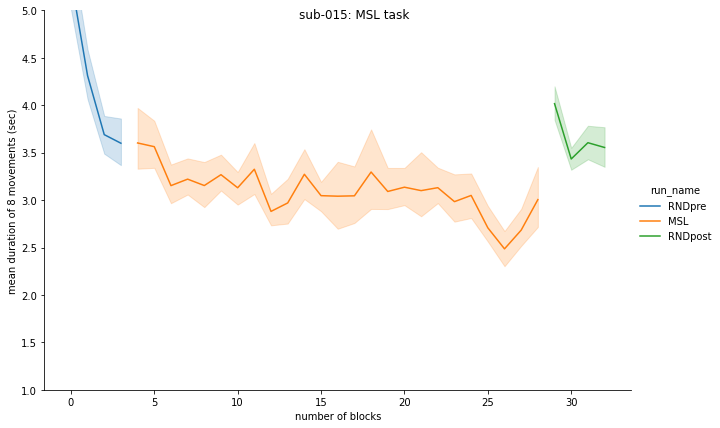

In [26]:
plot=sns.relplot(x="block_nb", y="duration",hue="run_name",data=mean_bySeq_concat["sub-014"]["MSL"],kind="line", height=6, aspect=1.5)
plot.set_axis_labels('number of blocks', 'mean duration of 8 movements (sec)')
plot.fig.suptitle('sub-015: MSL task')
plt.ylim(1, 5)  # Set the y-axis limits from 0 to 10


(1.0, 5.0)

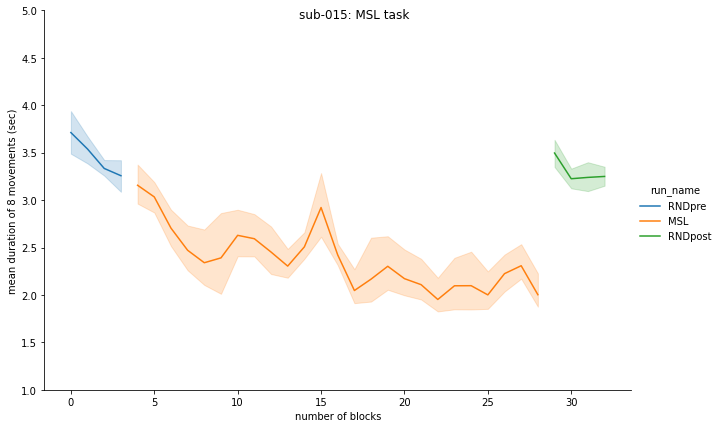

In [25]:
plot=sns.relplot(x="block_nb", y="duration",hue="run_name",data=mean_bySeq_concat["sub-015"]["MSL"],kind="line", height=6, aspect=1.5)
plot.set_axis_labels('number of blocks', 'mean duration of 8 movements (sec)')
plot.fig.suptitle('sub-015: MSL task')
plt.ylim(1, 5)  # Set the y-axis limits from 0 to 10


(1.0, 5.0)

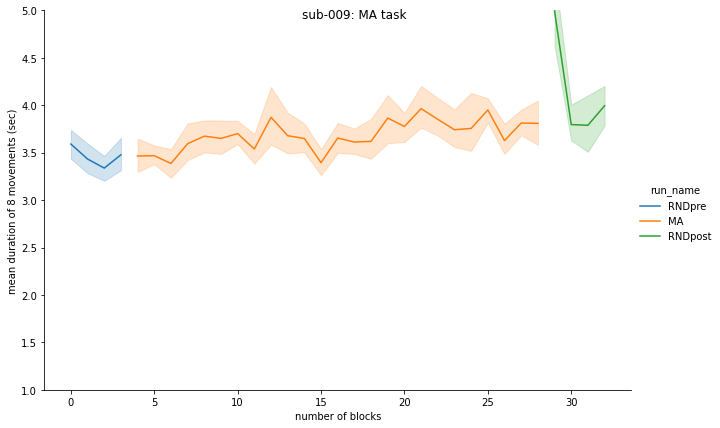

In [62]:
plot=sns.relplot(x="block_nb", y="duration",hue="run_name",data=mean_bySeq_concat["sub-009"]["MA"],kind="line", height=6, aspect=1.5)
plot.set_axis_labels('number of blocks', 'mean duration of 8 movements (sec)')
plot.fig.suptitle('sub-009: MA task')
plt.ylim(1, 5)  # Set the y-axis limits from 0 to 10


(1.0, 5.0)

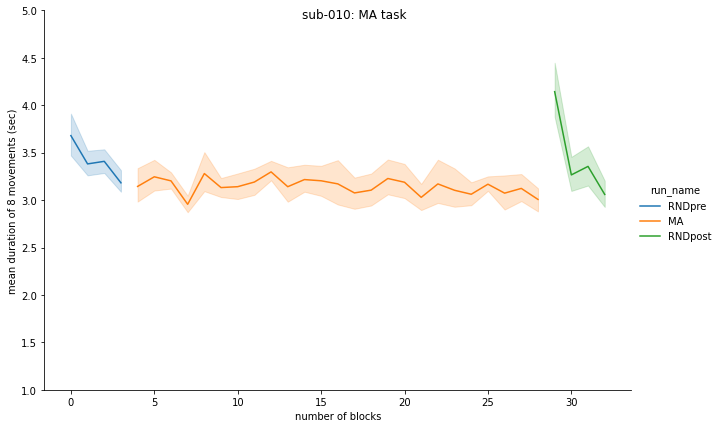

In [63]:
plot=sns.relplot(x="block_nb", y="duration",hue="run_name",data=mean_bySeq_concat["sub-010"]["MA"],kind="line", height=6, aspect=1.5)
plot.set_axis_labels('number of blocks', 'mean duration of 8 movements (sec)')
plot.fig.suptitle('sub-010: MA task')
plt.ylim(1, 5)  # Set the y-axis limits from 0 to 10


(1.0, 5.0)

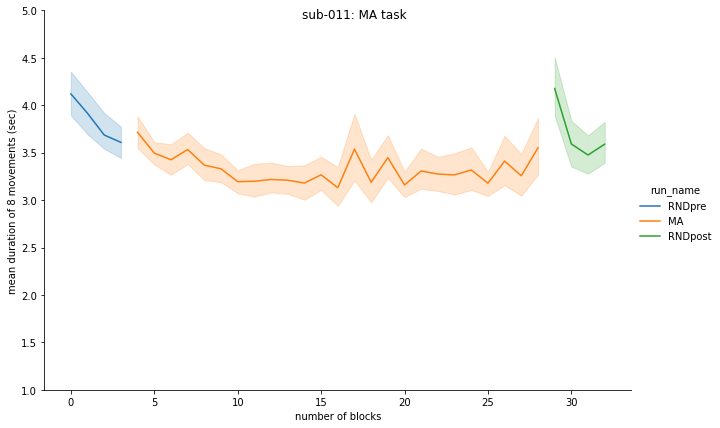

In [64]:
plot=sns.relplot(x="block_nb", y="duration",hue="run_name",data=mean_bySeq_concat["sub-011"]["MA"],kind="line", height=6, aspect=1.5)
plot.set_axis_labels('number of blocks', 'mean duration of 8 movements (sec)')
plot.fig.suptitle('sub-011: MA task')
plt.ylim(1, 5)  # Set the y-axis limits from 0 to 10


(1.0, 6.0)

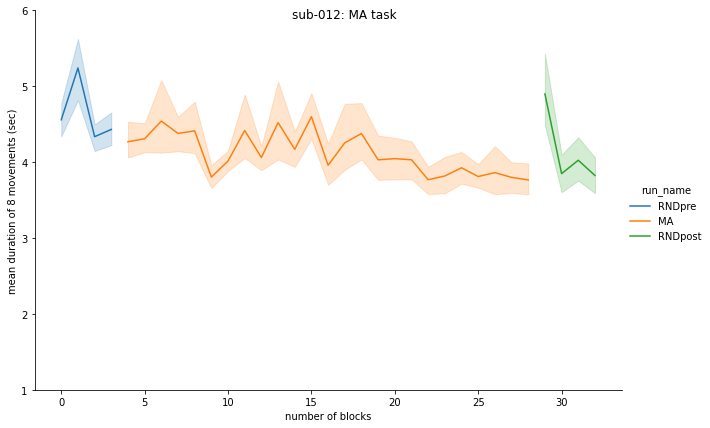

In [66]:
plot=sns.relplot(x="block_nb", y="duration",hue="run_name",data=mean_bySeq_concat["sub-012"]["MA"],kind="line", height=6, aspect=1.5)
plot.set_axis_labels('number of blocks', 'mean duration of 8 movements (sec)')
plot.fig.suptitle('sub-012: MA task')
plt.ylim(1, 6)  # Set the y-axis limits from 0 to 10


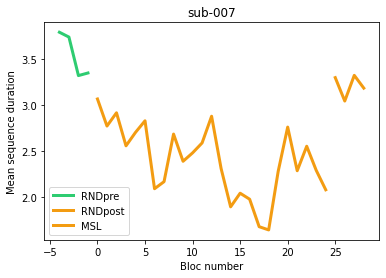

In [138]:
plt.plot([-4,-3,-2,-1],mean_byBlocks["sub-007"]["MSL"]["RNDpre"]["duration_mean"],color= "#2ecc71", linewidth=3,label='RNDpre')
plt.plot([25,26,27,28],mean_byBlocks["sub-007"]["MSL"]["RNDpost"]["duration_mean"],color= "#f39c12", linewidth=3,label='RNDpost')
plt.plot(mean_byBlocks["sub-007"]["MSL"]["MSL"]["block_nb"],mean_byBlocks["sub-007"]["MSL"]["MSL"]["duration_mean"],color= "#f39c12", linewidth=3,label='MSL')

plt.xlabel('Bloc number')
plt.ylabel('Mean sequence duration')
plt.title('sub-007')
plt.legend()

 ### <font color=#4424D6> III. Plot rawdata </font >

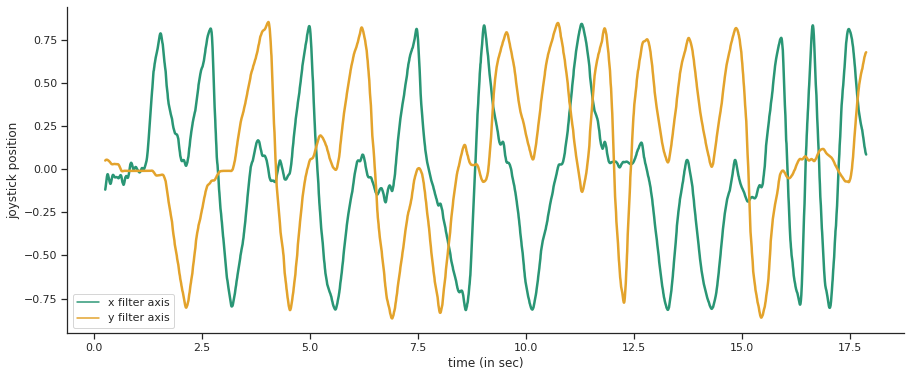

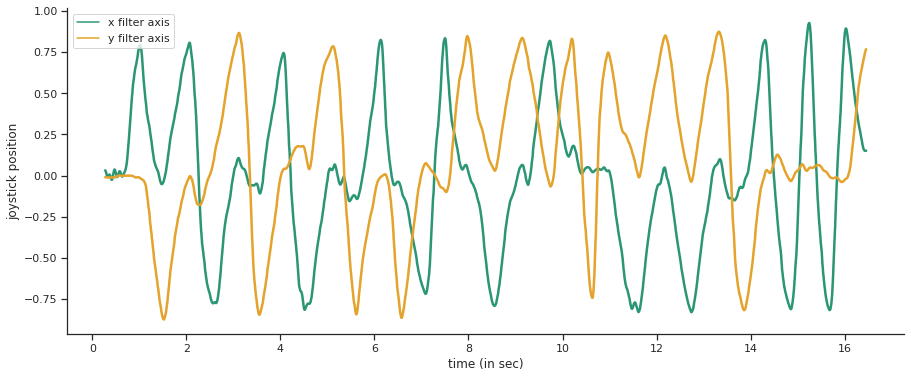

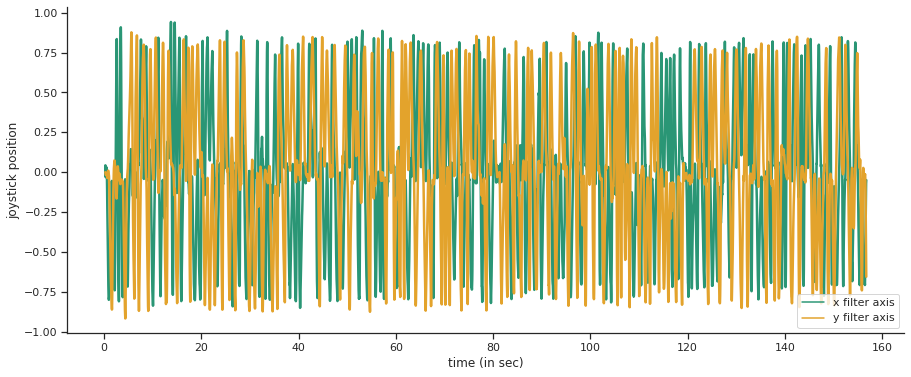

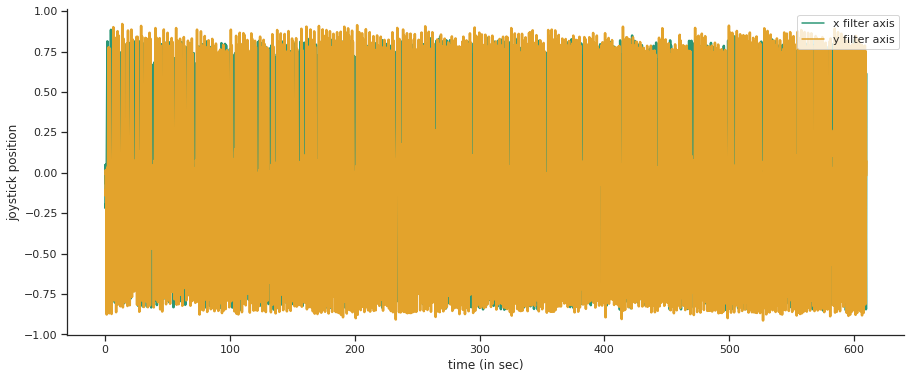

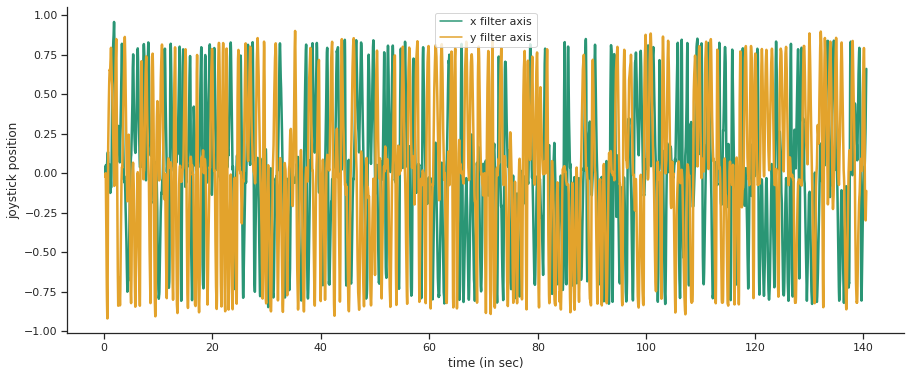

In [23]:
for subject_name in config["list_subjects"]:
    for sess_nb in range(0,1):#len(config["list_subjects"][subject_name])):
        sess=config["list_subjects"][subject_name]["sess0" + str(sess_nb+1)] # name of the session for that participant
        for run_name in config["subjects_acq"][subject_name]["sess0" + str(sess_nb+1)]:
            plot_filename=config["main_dir"] + config["data_dir"] + "/" + subject_name + "/sess_"+ sess + "/" + run_name + "/" + subject_name+ "_sess0"+str(sess_nb+1) + "_" + run_name +"_movement_raw.png"
            #print(sess + " " + run_name)
            data.plot_movement(subject_name,
                               movement_df[subject_name ][sess][run_name][100:],
                               sample_rate=0.0025,
                               save_plot=True,
                               plot_filename=plot_filename)